![Los Angeles skyline](assets/la_skyline.jpg)
_@Photo by Soly Moses_

# LAPD Crime Analysis Project

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood,
along with producing some of the most iconic films and songs.
However, as with any highly populated city, it is not always glamorous and there can be a large volume of crime.
A profound understanding of the criminal dynamics is crucial to enable the police
to strategically allocate their resources and increase their efficiency.

This project aims to analyze a publicly available dataset about criminal activities in Los Angeles.
Using Python and its data analysis libraries (Pandas, Matplotlib, Seaborn),
I sought to identify key trends, such as the predominant crime types,
their temporal variations (hour, day, month), and their geographic distribution across the city's various districts.

The analysis aims to transform raw data into actionable information, particularly through the creation of relevant visualizations, which could serve as a basis for a better understanding of crime phenomena and, potentially, more informed decision-making regarding prevention and resource allocation.

In [1]:
## importing python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title

In [2]:
crimes = pd.read_csv("data/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
...,...,...,...,...,...,...,...,...,...,...,...,...
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


In [3]:
crimes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


## Exploration of the Data

In [4]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [5]:
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

## What are the most represented crimes?

In [6]:
crimes['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY                                 22670
BATTERY - SIMPLE ASSAULT                          19694
BURGLARY FROM VEHICLE                             13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    13215
INTIMATE PARTNER - SIMPLE ASSAULT                 11981
                                                  ...  
BRIBERY                                               1
GRAND THEFT / INSURANCE FRAUD                         1
TILL TAP - GRAND THEFT ($950.01 & OVER)               1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    1
LYNCHING                                              1
Name: count, Length: 104, dtype: int64

## Which age, sex and ethnicity are more likely to be victims?

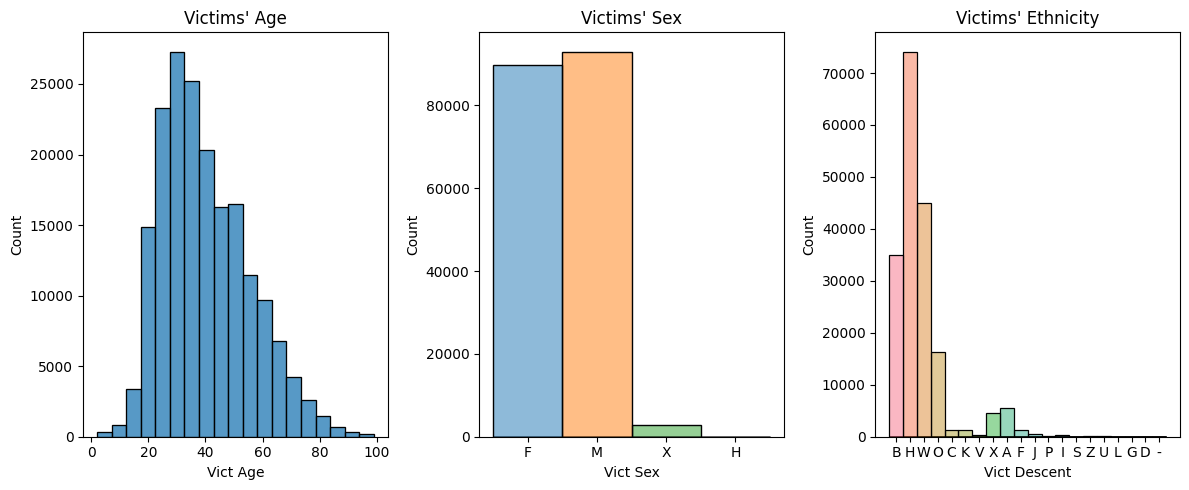

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(data=crimes, x='Vict Age', binwidth=5, ax=ax[0], legend=False)
ax[0].set_title("Victims' Age")
sns.histplot(x='Vict Sex', data=crimes, hue='Vict Sex', ax=ax[1], legend=False)
ax[1].set_title("Victims' Sex")
sns.histplot(x='Vict Descent', data=crimes, hue='Vict Descent', ax=ax[2], legend=False)
ax[2].set_title("Victims' Ethnicity")

plt.tight_layout()
plt.show()

## Analyzing the temporality of crimes

In [4]:
crimes['MONTH'] = crimes['DATE OCC'].dt.month
crimes['DAY'] = crimes['DATE OCC'].dt.day_name()
crimes['HOUR'] = crimes['TIME OCC'].str[:2].astype(int)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

monthly_crimes = crimes['MONTH'].value_counts().sort_index()
sns.barplot(x=monthly_crimes.index, y=monthly_crimes.values, ax=ax[0], hue=monthly_crimes.values, palette="Reds")
ax[0].set_title("Monthly Crime Count")

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_crimes = crimes['DAY'].value_counts().reindex(day_order)
sns.barplot(x=daily_crimes.index, y=daily_crimes.values, ax=ax[1], hue=daily_crimes.values, palette="Blues")
ax[1].set_title("Daily Crime Count")

hourly_crimes = crimes['HOUR'].value_counts().sort_index()
sns.barplot(x=hourly_crimes.index, y=hourly_crimes.values, ax=ax[2], hue=hourly_crimes.values, palette="Greens")
ax[2].set_title("Hourly Crime Count")

plt.tight_layout()
plt.show()

## Geographical Analysis

In [ ]:
import folium
from folium.plugins import HeatMap

In [21]:
m = folium.Map(location=[34.0522, -118.2437], zoom_start=11)
area_crime_counts = crimes['AREA NAME'].value_counts()

In [35]:
def geocode_address(address, city='Los Angeles', state='CA'):
    geolocator = Nominatim(user_agent="crime_analysis")
    location = geolocator.geocode(f"{address}, {city}, {state}", timeout=10)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

In [ ]:
top_areas = area_crime_counts.nlargest(10).index.tolist()
sample_crimes = crimes[crimes['AREA NAME'].isin(top_areas)].sample(100, random_state=1)

geo_locations = {}
for idx, row in crimes.iterrows():
    location = row['LOCATION']
    if pd.notnull(location) and location not in geo_locations:
        coords = geocode_address(location)
        if coords:
            geo_locations[location] = coords
        time.sleep(1)

print(f"We found {len(geo_locations)} on {crimes['LOCATION'].nunique()} unique locations")

In [56]:
# Réinitialiser la carte
m = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Importer MarkerCluster
from folium.plugins import MarkerCluster

# Créer un cluster de marqueurs
marker_cluster = MarkerCluster().add_to(m)

# Ajouter chaque crime au cluster
for location, coords in geo_locations.items():
    # Trouver les crimes à cet emplacement
    crimes_at_location = sample_crimes[sample_crimes['LOCATION'] == location]

    # Créer un popup avec les informations sur les crimes
    popup_text = f"Location: {location}<br>"
    popup_text += f"Nombre de crimes: {len(crimes_at_location)}<br>"
    popup_text += "Types de crimes:<br>"

    for crime_type in crimes_at_location['Crm Cd Desc'].unique():
        popup_text += f"- {crime_type}<br>"

    # Ajouter un marqueur au cluster
    folium.Marker(
        location=coords,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(marker_cluster)

m.save("data/crime_clusters.html")
m

In [68]:
# Group by day and get actual data points, not just counts
# For example, using crime rates per hour or some other numerical value
crime_rates_by_day = []
for day in day_order:
    # Get hourly crime rates for this day
    day_crimes = crimes[crimes['DAY'] == day].groupby('HOUR').size().values
    if len(day_crimes) > 0:  # Only add if there are crimes on this day
        crime_rates_by_day.append(day_crimes)

# Only run ANOVA if we have sufficient data
if all(len(day_data) >= 5 for day_data in crime_rates_by_day):
    f_stat, p_value = stats.f_oneway(*crime_rates_by_day)
    print(f"ANOVA results: F={f_stat}, p={p_value}")
else:
    print("Insufficient data for ANOVA test")

ANOVA results: F=0.46109266649534336, p=0.8362768827118976


In [67]:
# Create a contingency table of observed frequencies
observed = pd.Series(crimes['DAY'].value_counts())
observed = observed.reindex(day_order)

# Calculate expected frequencies (equal distribution)
expected = np.ones(7) * (len(crimes) / 7)

# Chi-square test
chi2, p_value = stats.chisquare(observed, f_exp=expected)
print(f"Chi-square test: chi2={chi2}, p={p_value}")

Chi-square test: chi2=335.8512451875185, p=1.679596717315974e-69
